In [2]:
'''
Base agents that observe partial environments and take actions based on preferences
'''
import gym
import gym_minigrid
from gym_minigrid import wrappers
from gym_minigrid.minigrid import OBJECT_TO_IDX, COLOR_TO_IDX, STATE_TO_IDX

class PlanAgent:
    # Agent that has a plan! :D
    def __init__(self, env):
        # Given the env, get all the parameters like size and agent details
        # Env would be wrapped in a wrapper that gives agent location and direction
        self.env = env.env
        self.agent_view_size = self.env.agent_view_size
        self.width = self.env.width
        self.height = self.env.height

        self.plan = []


env = gym.make('MiniGrid-FourRooms-v0')
env = wrappers.AgentExtraInfoWrapper(env)

In [3]:
OBJECT_TO_IDX

{'unseen': 0,
 'empty': 1,
 'wall': 2,
 'floor': 3,
 'door': 4,
 'key': 5,
 'ball': 6,
 'box': 7,
 'goal': 8,
 'lava': 9,
 'agent': 10}

In [4]:
COLOR_TO_IDX

{'red': 0, 'green': 1, 'blue': 2, 'purple': 3, 'yellow': 4, 'grey': 5}

In [101]:
obs = env.reset()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


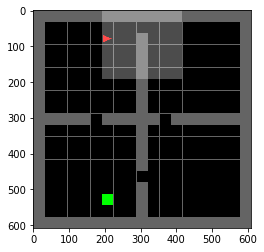

In [102]:
%pylab
%matplotlib inline
plt.imshow(env.render('rgb_array'))

In [103]:
obs['image'][:, :, 0]

array([[0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1]], dtype=uint8)

In [104]:
obs['dir']

0

In [105]:
def rotate_right(grid):
    ngrid = grid * 0
    H, W = grid.shape[:2]
    for i in range(H):
        for j in range(W):
            ngrid[j, H-1-i] = grid[i, j] + 0
    return ngrid

In [106]:
img = obs['image']
for i in range(obs['dir'] + 1):
    img = rotate_right(img)

In [107]:
img[:, :, 0].T

array([[1, 1, 1, 2, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1],
       [1, 1, 1, 2, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)